# Project 2: mushroom classification
<br>
Use the SHAP analysis to answer the following questions:
<ol>
<li> For the first prediction, which feature has the most significant contibution?
<li> Overall, which feature has the most significant contributions? 
<li> Which odors are associated with poisonous mushrooms? 
</ol>

<b>Dataset:</b> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

import shap

from sklearn.metrics import accuracy_score,confusion_matrix

/Users/conorosully/miniconda3/envs/SHAP/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#load data 
data = pd.read_csv("../data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X = data.drop('class', axis=1)


print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
model.fit(X, y, cat_features)

#Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

0:	learn: 0.6660194	total: 61.5ms	remaining: 1.17s
1:	learn: 0.6373576	total: 67.7ms	remaining: 610ms
2:	learn: 0.6125475	total: 73.4ms	remaining: 416ms
3:	learn: 0.5880232	total: 77.9ms	remaining: 312ms
4:	learn: 0.5652512	total: 83.4ms	remaining: 250ms
5:	learn: 0.5428184	total: 87.5ms	remaining: 204ms
6:	learn: 0.5222711	total: 91.6ms	remaining: 170ms
7:	learn: 0.5016943	total: 95.8ms	remaining: 144ms
8:	learn: 0.4779907	total: 102ms	remaining: 124ms
9:	learn: 0.4601680	total: 107ms	remaining: 107ms
10:	learn: 0.4447001	total: 111ms	remaining: 90.6ms
11:	learn: 0.4281286	total: 117ms	remaining: 77.9ms
12:	learn: 0.4125468	total: 122ms	remaining: 65.6ms
13:	learn: 0.3990776	total: 126ms	remaining: 53.8ms
14:	learn: 0.3861614	total: 131ms	remaining: 43.7ms
15:	learn: 0.3724813	total: 135ms	remaining: 33.8ms
16:	learn: 0.3560532	total: 139ms	remaining: 24.5ms
17:	learn: 0.3448969	total: 145ms	remaining: 16.1ms
18:	learn: 0.3331749	total: 151ms	remaining: 7.94ms
19:	learn: 0.3218024	tot

0.9852289512555391

# Standard SHAP values

In [4]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

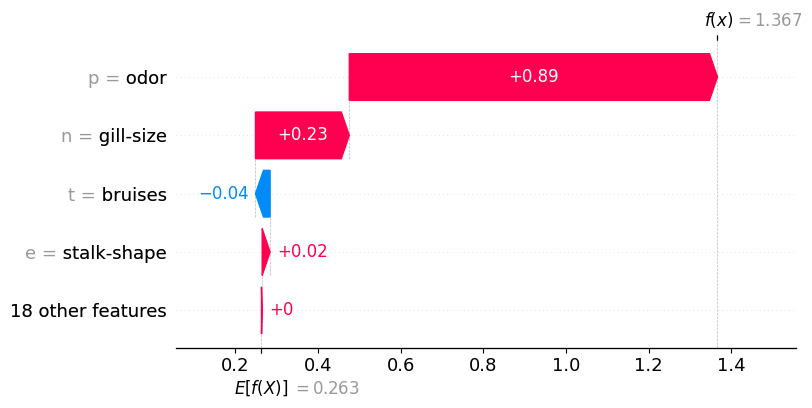

In [5]:
#For the first prediction, which feature has the most significant contribution?
#Answer: odor
shap.plots.waterfall(shap_values[0],max_display=5)

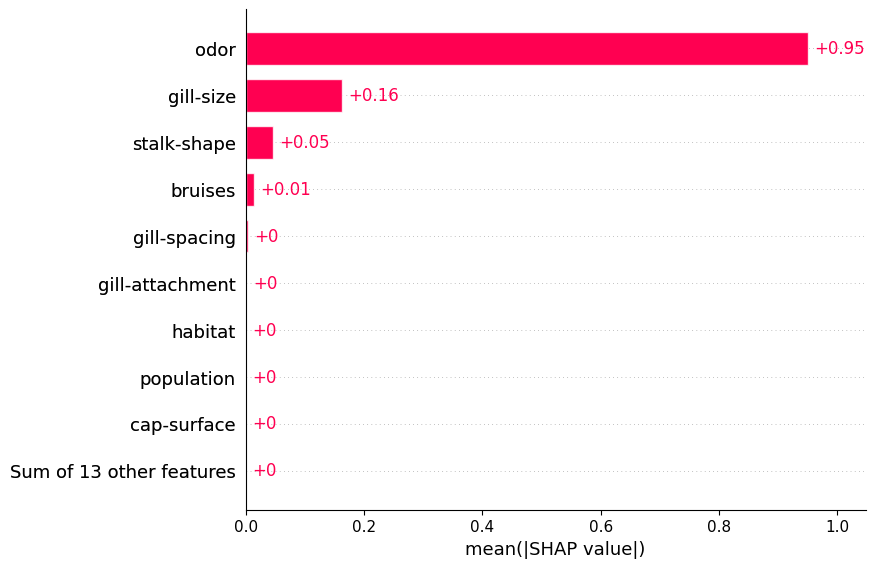

In [6]:
#Overall, which feature has the most significant contributions?
#Answer: odor
shap.plots.bar(shap_values,show=False)

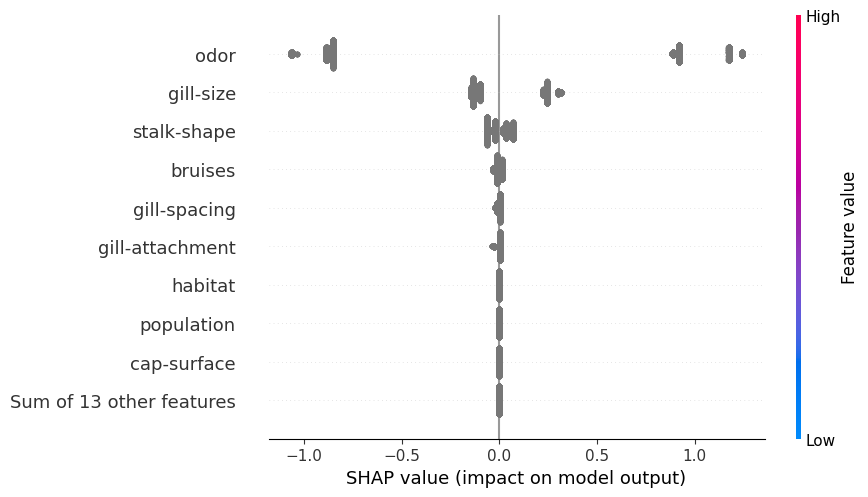

In [7]:
shap.plots.beeswarm(shap_values)

In [ ]:
#Which odors are associated with poisonous mushrooms?
#All the odors with SHAP values > 0 

Text(0.5, 0, 'Odor')

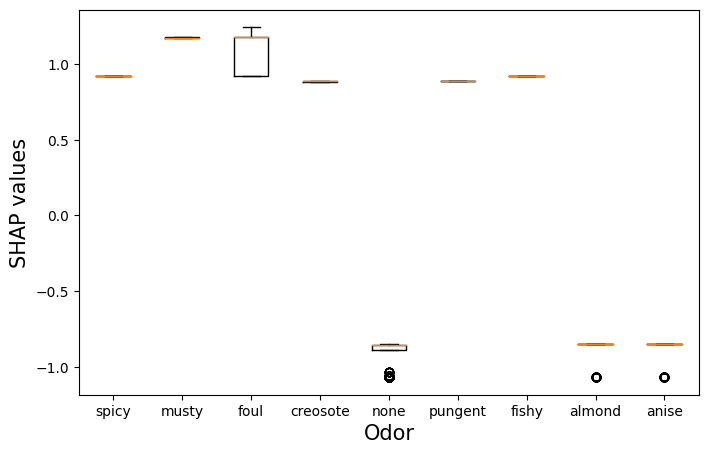

In [8]:
#get shaply values and data
odor_values = shap_values[:,4].values
odor_data = X['odor']
unique_odor = set(X['odor'])

#split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
#replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('SHAP values',size=15)
plt.xlabel('Odor',size=15)